# **LAB 5 - PART 2 CNN**

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### **Data Preparation**
- **Create two images**: one for a square and another for a triangle.<br>
    Each image should be 4x4 pixels with values as shown below.<br>
    Then stack them in to tensor like `torch.tensor([<square tensor>,<triangle tensor>])`.

- **Create the label**: create the labels that correspond to each image. Use 1 for square and 0 for triangle.<br>

Then display the images as shown below.

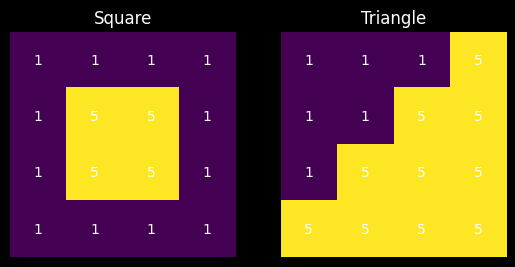

In [2]:
### START CODE HERE ###
square = [
    [1,1,1,1],
    [1,0,0,1],
    [1,0,0,1],
    [1,1,1,1]
]
triangle = [
    [1,1,1,0],
    [1,1,0,0],
    [1,0,0,0],
    [0,0,0,0]
]

tensor_square = torch.tensor([ square ])
tensor_triangle = torch.tensor([ triangle ])

labels_square = torch.tensor([ 0 ])
labels_triangle = torch.tensor([ 1 ])

data_tensors = torch.stack([tensor_square, tensor_triangle])
data_labels = torch.stack([labels_square, labels_triangle]) 

### END CODE HERE ###

If your code is correct, this cell will execute without any issues.

In [3]:
data_tensors.shape

torch.Size([2, 1, 4, 4])

In [4]:
assert data_tensors.shape == torch.Size([2, 1, 4, 4])
assert data_labels.shape == torch.Size([2, 1])
print("You have successfully created the data_tensors!")

You have successfully created the data_tensors!


A `DataLoader` is a PyTorch utility that helps in loading and batching data for training or inference. <br>
It takes in a dataset as input and provides an iterable over the dataset, allowing you to access the data in batches.

In [5]:
dataset = torch.utils.data.TensorDataset(data_tensors, data_labels)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=True)

### **Define the SimpleCNN Architecture**

**Create simpleCNN model class using PyTorch.**
- Using `Conv2d()`,`ReLU()`,`Flatten()`,`Linear()`,`Sigmoid()`


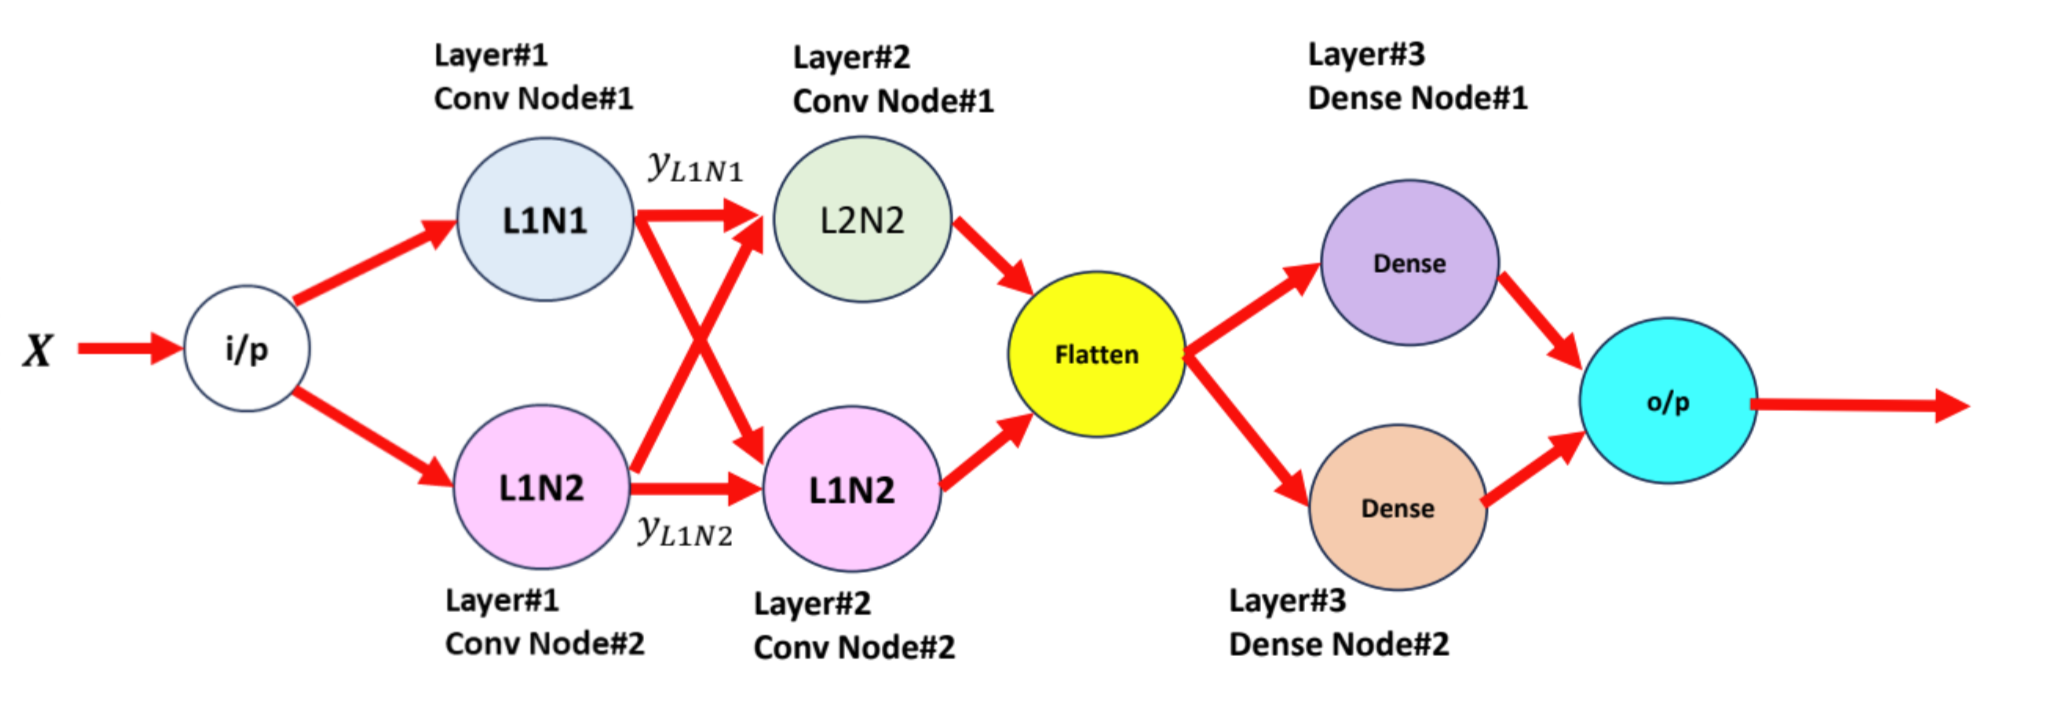

In [6]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        ### START CODE HERE ###
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=2, out_channels=2, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(32,2)
        self.relu3 = nn.ReLU()
        self.out = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid() 
        ### END CODE HERE ###

    def get_features(self, x):
        """
        Function to get the feature maps of the input
        """
        x = self.conv1(x)
        f1 = self.relu1(x)
        x = self.conv2(f1)
        f2 = self.relu2(x)
        return f1,f2

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.flatten(x)
        x = self.fc(x)
        x = self.relu3(x)
        x = self.out(x)
        x = self.sigmoid(x)
        return x

# Set the random seed for reproducible results
torch.manual_seed(841)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
print(model)

SimpleCNN(
  (conv1): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(2, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=32, out_features=2, bias=True)
  (relu3): ReLU()
  (out): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


If your model architechture is correct. this cell will execute without any issues.

In [7]:
assert model(tensor_triangle.unsqueeze(1).float().to(device)).shape == torch.Size([1, 1])
print("You have successfully implemented a forward pass!")

You have successfully implemented a forward pass!


### **Train the model for `n` Epochs.**<br>

After the training process you'll have to plot the model's loss for each epoch.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

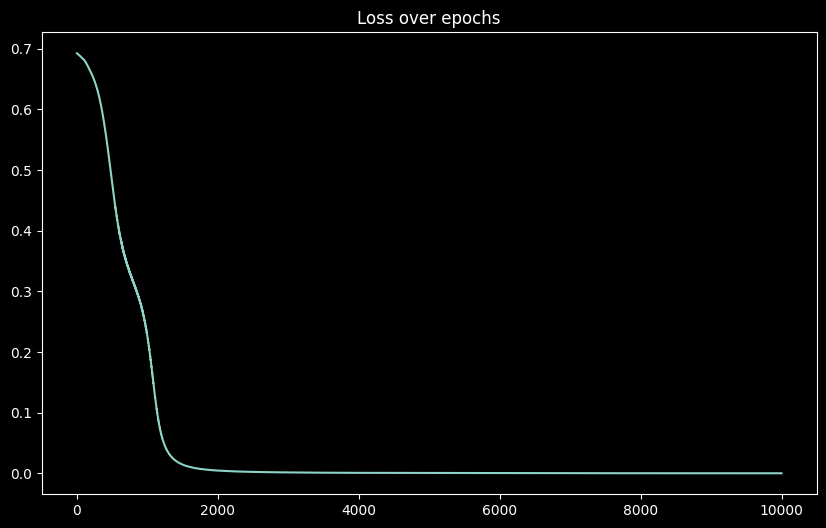


</details>

In [8]:
### START CODE HERE ###
epochs = 1000
lr = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_history = None
for epoch in range(epochs):
    for x,y in dataloader:
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        output = model(x.float())
        loss = criterion(output, y.float())
        loss.backward()
        optimizer.step()
        

    if (epoch+1) % 100 == 0:
        print(f'[Epoch {epoch+1}] Loss: {loss.item()}')
### END CODE HERE ###

[Epoch 100] Loss: 0.6802502870559692
[Epoch 200] Loss: 0.6711872816085815
[Epoch 300] Loss: 0.6512651443481445
[Epoch 400] Loss: 0.5992231369018555
[Epoch 500] Loss: 0.4572480320930481
[Epoch 600] Loss: 0.319459468126297
[Epoch 700] Loss: 0.2575458288192749
[Epoch 800] Loss: 0.2202344536781311
[Epoch 900] Loss: 0.19151955842971802
[Epoch 1000] Loss: 0.16858306527137756


**Print model's weight**

- Using `.state_dict()`

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

```
OrderedDict([('conv1.weight',
              tensor([...], device='cuda:0')),
             ('conv1.bias', tensor([...], device='cuda:0')),
             ('conv2.weight',
              ...
             ('out.weight', tensor([...], device='cuda:0')),
             ('out.bias', tensor([...], device='cuda:0'))])
```

</details>

In [9]:
### START CODE HERE ###
model.state_dict()
### END CODE HERE ###

OrderedDict([('conv1.weight',
              tensor([[[[ 0.4292,  0.2513, -0.0859],
                        [ 0.2925, -0.4213, -0.4130],
                        [-0.0860, -0.2536, -0.2639]]],
              
              
                      [[[-0.1061,  0.0241,  0.2461],
                        [ 0.2722,  0.3428,  0.1316],
                        [-0.1527,  0.3915,  0.5001]]]])),
             ('conv1.bias', tensor([0.0839, 0.1583])),
             ('conv2.weight',
              tensor([[[[ 0.1569,  0.0135, -0.4253],
                        [-0.2030, -0.0808, -0.2920],
                        [-0.2072, -0.2952, -0.1491]],
              
                       [[-0.0346,  0.2698,  0.3228],
                        [ 0.2674,  0.4024,  0.2997],
                        [ 0.0265,  0.1404,  0.2004]]],
              
              
                      [[[-0.0985, -0.1308,  0.0344],
                        [-0.1508,  0.0087,  0.0416],
                        [-0.2818,  0.2055,  0.2647]],
    

**Show feature maps of each model's filters with 2 classes of inputs.**

- Use `.get_features()`
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

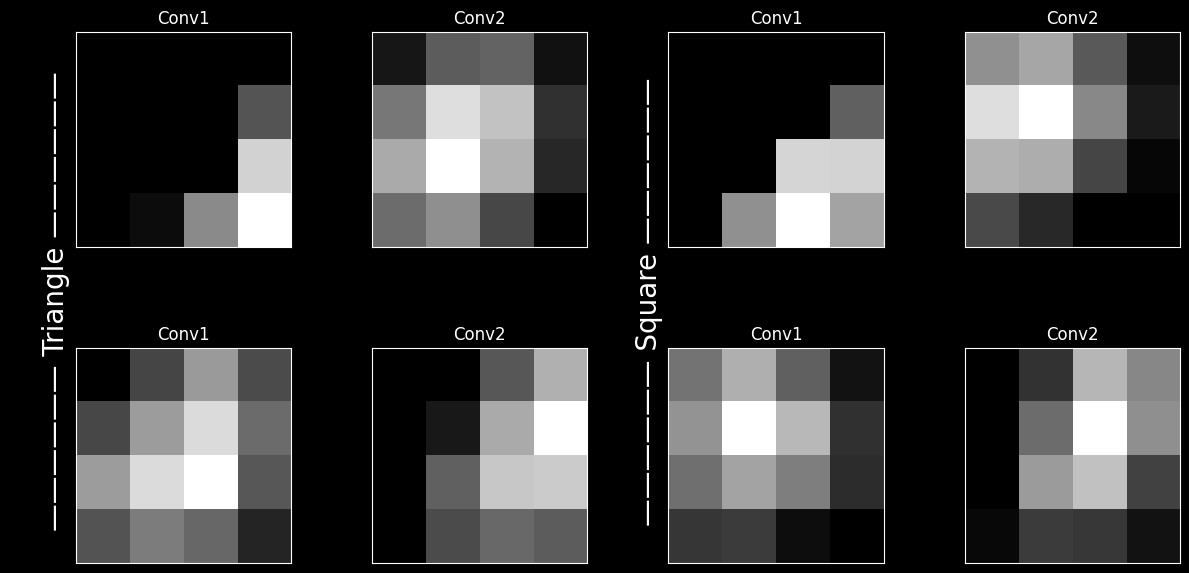

</details>

In [10]:
### START CODE HERE ###

conv1_triangle, conv2_triangle = model.get_features(tensor_triangle.unsqueeze(1).float().to(device))
conv1_square, conv2_square = model.get_features(tensor_square.unsqueeze(1).float().to(device))



### END CODE HERE ###

The right half is square


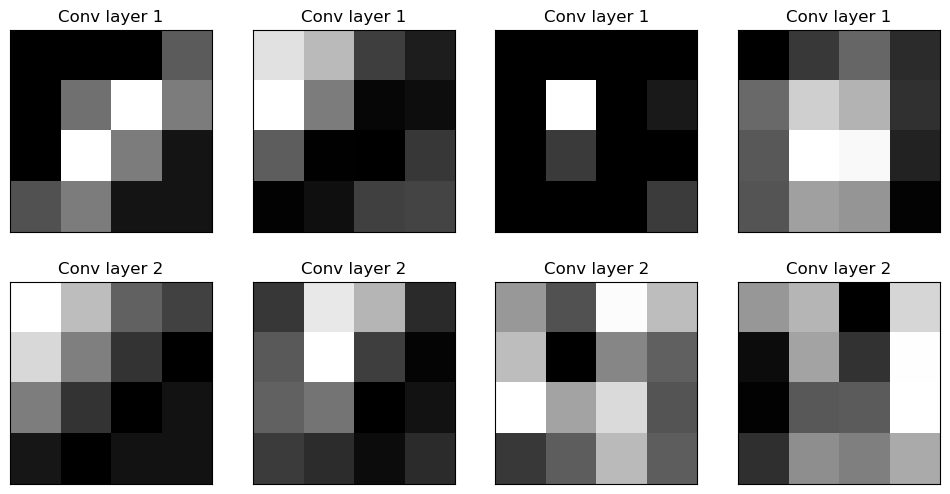

In [11]:
plt.figure(figsize=(12,6))

feature_maps = [conv1_triangle, conv2_triangle, conv1_square, conv2_square]
titles = ["Conv layer 1", "Conv layer 2"]

for i, feature_map in enumerate(feature_maps):
    plt.subplot(2, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature_map[0, 0].squeeze().cpu().detach().numpy(), cmap='gray')
    plt.title(titles[0])  # Add title to subplot
    plt.subplot(2, 4, i+5)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature_map[0, 1].squeeze().cpu().detach().numpy(), cmap='gray')
    plt.title(titles[1])  # Add title to subplot

print("The right half is square")

### **Evaluate how the model generalize.**

- **Create two images**: one for a square and another for a triangle.<br>
    Each image should be 4x4 pixels with values as shown below.<br>
    Then stack them in to tensor like `torch.tensor([<square tensor>,<triangle tensor>])`.

- **Create the label**: create the labels that correspond to each image. Use 1 for square and 0 for triangle.<br>

Then display the images as shown below.

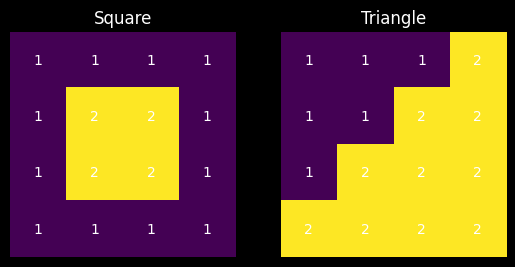

In [12]:
conv1_triangle

tensor([[[[0.0000, 0.0000, 0.0000, 0.3764],
          [0.0000, 0.4637, 1.0569, 0.5131],
          [0.0000, 1.0569, 0.5131, 0.0839],
          [0.3352, 0.5131, 0.0839, 0.0839]],

         [[1.5243, 1.1437, 0.6206, 0.4306],
          [1.2943, 0.7847, 0.3485, 0.0522],
          [0.7713, 0.3485, 0.0522, 0.1583],
          [0.1824, 0.0522, 0.1583, 0.1583]]]], grad_fn=<ReluBackward0>)

In [13]:
### START CODE HERE ###
square_test = square
triangle_test = triangle

tensor_square_test = torch.tensor([ square_test ])
tensor_triangle_test = torch.tensor([ triangle_test ])

labels_square_test = torch.tensor([ 0 ])
labels_triangle_test = torch.tensor([ 1 ])

test_data_tensors = torch.stack([tensor_square_test, tensor_triangle_test])
test_data_labels = torch.stack([labels_square_test, labels_triangle_test])

### END CODE HERE ###

If your code is correct, this cell will execute without any issues.

In [14]:
assert data_tensors.shape == torch.Size([2, 1, 4, 4])
assert data_labels.shape == torch.Size([2, 1])
print("You have successfully created the data_tensors!")

You have successfully created the data_tensors!


**Show feature maps of each model's filters with 2 classes of test data.**

- Use `.get_features()`

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

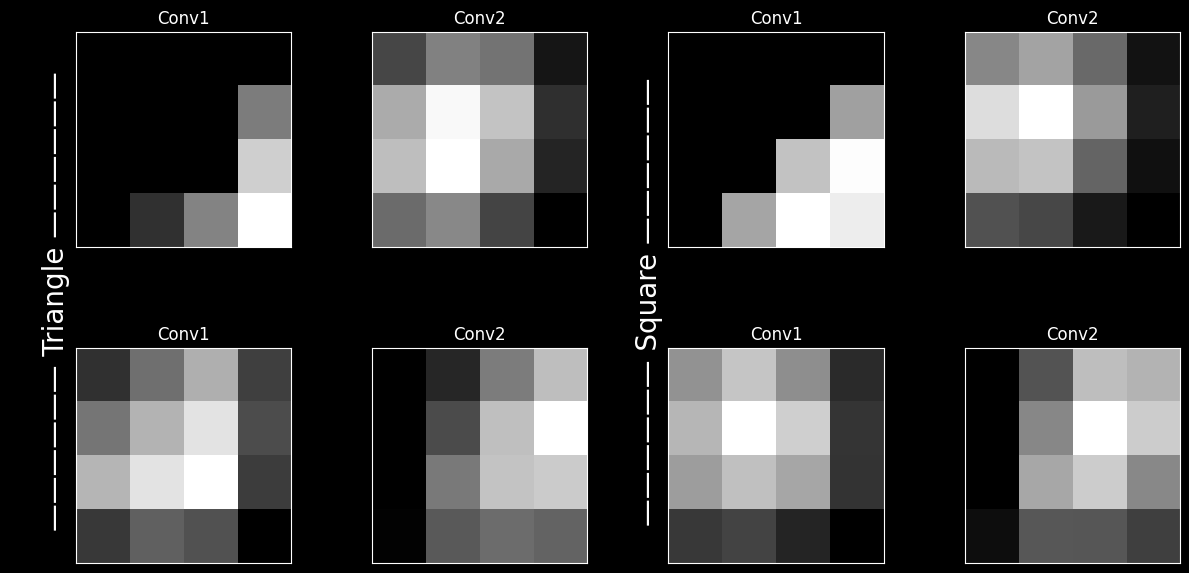

</details>

In [15]:
### START CODE HERE ###
conv1_triangle, conv2_triangle = model.get_features(tensor_triangle.unsqueeze(1).float().to(device))
conv1_square, conv2_square = model.get_features(tensor_square.unsqueeze(1).float().to(device))

### END CODE HERE ###

**Try to predict classes using the test dataset. Then, plot the confusion matrix and print the classification report.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

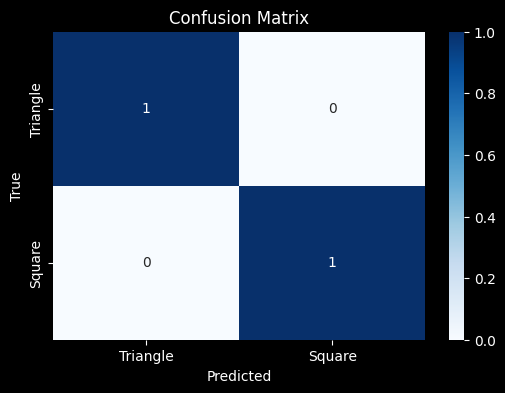

```
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

```

</details>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



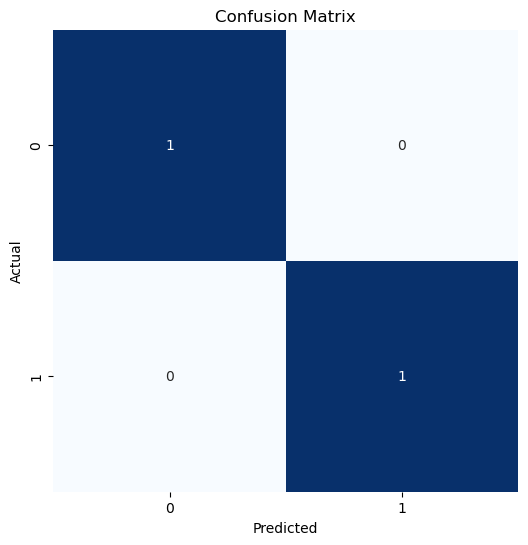

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
### START CODE HERE ###
# Predict classes using the test dataset
test_predictions = model(test_data_tensors.float().to(device)).round().cpu().detach().numpy()

# Convert predictions to labels
test_predictions = test_predictions.astype(int).flatten()

# Calculate confusion matrix
cm = confusion_matrix(test_data_labels.flatten().numpy(), test_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Print classification report
print(classification_report(test_data_labels.flatten().numpy(), test_predictions))




### END CODE HERE ###